In [1]:
#%load_ext autoreload
#%autoreload 2

import os
import numpy as np 
from multiprocessing import Pool
import time 
import random
import IPython.display as ipd
import pyaudio
import sys
import librosa
import librosa.display
from tqdm import tqdm
from matplotlib import pyplot as plt
sys.path.append('../../')

import pdb
#import utils.audio as a
#import utils.plots as plots
import utils as utils

### Load audio files into dataset

In [2]:
# load (fe)male audio sequences without alpha, beta 
PATH = '../../datasets/freesound.org/wav/'
SR = 22050 

dataset = []

files = os.listdir(PATH)

for f in tqdm(files):
    if f.split('.')[-1] != 'wav':
        continue
    #pdb.set_trace()
    audio, sr = utils.audio.loadAudio(PATH + f, sr=SR)
    dataset.append(audio)

100%|██████████| 383/383 [00:00<00:00, 587.76it/s]


In [3]:
dataset = np.array(dataset)
len(dataset[0])

51237

In [4]:
# read data
data = utils.misc.slidingWindow(dataset, int(SR*1), int(SR*1))

In [5]:
# create chunks
dataset_chunks = []
for chunk in dataset:
    #pdb.set_trace()
    dataset_chunks.append(utils.misc.slidingWindow(chunk, int(SR*1), int(SR*1)))


In [6]:
# concatenate chunks
chunks = np.array(dataset_chunks)
chunks = np.concatenate((chunks[:]), axis=0)
chunks.shape

(3075, 22050)

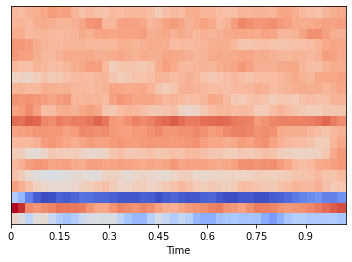

In [7]:
# librosa
#inp = chunks[np.random.randint(1000), np.random.randint(10)]
inp = chunks[np.random.randint(1000), :]
mfccs = librosa.feature.mfcc(y=inp, sr=SR, n_mfcc=20) #has quite a bunch of parameters
librosa.display.specshow(mfccs, sr=SR, x_axis='time')
ipd.Audio(inp, rate=SR)

In [8]:
num_points = 1000
num_feats = 6
num_chunks = chunks.shape[0]
X = np.zeros((num_chunks, 44*num_feats))
for i in tqdm(range(num_chunks)):
    #pdb.set_trace()
    X[i, :] = librosa.feature.mfcc(y=chunks[i, :], sr=SR, n_mfcc=num_feats).flatten()

100%|██████████| 3075/3075 [00:08<00:00, 360.74it/s]


In [9]:
X.shape

(3075, 264)

In [10]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

new_X = StandardScaler().fit_transform(X)

new_X = X

pca = PCA(n_components=20)
#pca_X = pca.fit_transform(new_X)

pca_X = new_X

In [11]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=6, verbose=2).fit(pca_X)
labels = gmm.predict(pca_X)

Initialization 0
  Iteration 10	 time lapse 3.44776s	 ll change 0.00884
Initialization converged: True	 time lapse 4.78418s	 ll -875.15001


(3075,)


(array([332.,   0., 341.,   0.,  78.,   0., 898.,   0., 782., 644.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <BarContainer object of 10 artists>)

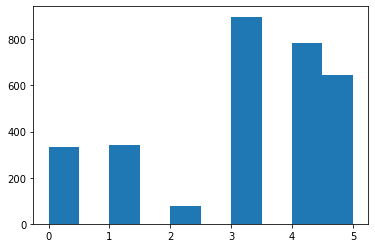

In [12]:
print(labels.shape)
plt.hist(labels)
#print(labels[1000:2000])

In [13]:
#%matplotlib inline
plot_X = PCA(n_components=3).fit_transform(pca_X)

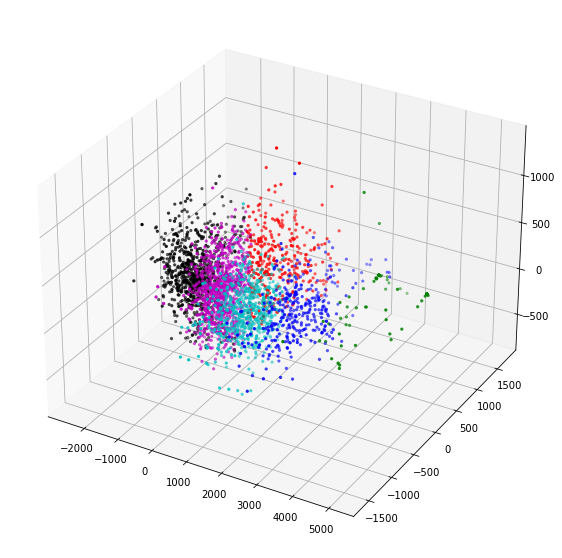

In [14]:
%matplotlib inline
colors = ['r', 'b', 'g', 'm', 'k', 'c']
fig1 = plt.figure(figsize=[20, 10])
ax1 = fig1.add_subplot(111, projection='3d')
for i in range(6):
    ax1.scatter(plot_X[labels==i, 0], plot_X[labels==i, 1], plot_X[labels==i, 2], c=colors[i], s=5.);
plt.show()

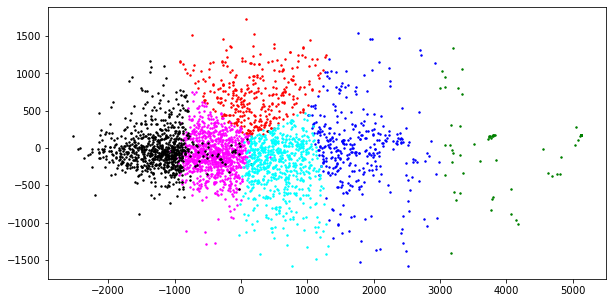

In [15]:
#%matplotlib inline
plot_X2 = PCA(n_components=2).fit_transform(pca_X)
colors = ['red', 'blue', 'green', 'magenta', 'black', 'cyan']
fig2 = plt.figure(figsize=[10, 5])
ax2 = fig2.add_subplot(111)
for i in range(6):
    ax2.scatter(plot_X2[labels==i, 0], plot_X2[labels==i, 1], c=colors[i], s=2.1);
plt.show()

In [37]:
target = 2

idx = np.where(labels==target)[0][0]
print(labels[idx])
#i = idx // num_chunks
#j = idx % num_chunks
ipd.Audio(chunks[idx, :], rate=SR)

2


In [38]:
idx = np.where(labels==target)[0][10]
print(labels[idx])
#i = idx // num_chunks
#j = idx % num_chunks
ipd.Audio(chunks[idx, :], rate=SR)

2


In [39]:
idx = np.where(labels==target)[0][20]
print(labels[idx])
#i = idx // num_chunks
#j = idx % num_chunks
ipd.Audio(chunks[idx, :], rate=SR)

2


/opt/anaconda3/envs/aip37/lib/python3.7/site-packages/IPython/lib/display.py:172: RuntimeWarning: invalid value encountered in true_divide
  scaled = data / normalization_factor * 32767


In [40]:
idx = np.where(labels==target)[0][30]
print(labels[idx])
#i = idx // num_chunks
#j = idx % num_chunks
ipd.Audio(chunks[idx, :], rate=SR)

2
